In [1]:
import numpy as np
import pymesh
import pandas as pd
import re,math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def distance3D(a, b):
    return math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2+(a[2]-b[2])**2)


def distance2D(a, b):
        return math.sqrt( ((b[0]-a[0])**2)  + ((b[1]-a[1])**2) )


In [3]:
mesh_f = "out/torsos_smooth/model_mesh_001.ply"
mesh = pymesh.load_mesh(mesh_f)
landmarks = pd.read_csv("../../Datos/data_artificial_cites/landmarks_reales/model_mesh_001.pts",header=None,index_col=[0],skiprows=range(2),delimiter=r"\s+")

In [4]:
ls0 = landmarks.iloc[0].tolist()
ls1 = landmarks.iloc[4].tolist()
ls2 = landmarks.iloc[9].tolist()
ls3 = landmarks.iloc[10].tolist()
head = landmarks.iloc[14].tolist()
knee_left = landmarks.iloc[8].tolist()
knee_right = landmarks.iloc[5].tolist()

In [5]:
# ids_1 = ["025","026","061","065","067","070","073","078","079","080","081","085","086","090","097","094"]
# ids_2 = ["002","034","064","071","087","088","092","098"]
# ids_3 = ["005","033","048","051","114","137","138","145"]

# alpha = -(math.pi /8)
# if(re.findall(r'\d+', mesh_f)[0] in ids_1):
#     alpha = alpha - (math.pi /12)
# if(re.findall(r'\d+', mesh_f)[0] in ids_2):
#     alpha = alpha - math.radians(5)
# if(re.findall(r'\d+', mesh_f)[0] in ids_3):
#     alpha = alpha - math.radians(3)

# #matrix = [[1,0,0],[0,math.cos(alpha),-math.sin(alpha)],[0,math.sin(alpha),math.cos(alpha)],[0,0,0]]
# matrix = [[1,0,0,0],[0,math.cos(alpha),-math.sin(alpha),0],[0,math.sin(alpha),math.cos(alpha),0],[0,0,0,1]]   

# ls0 = np.dot(matrix,[ls0[0],ls0[1],ls0[2],1])[:-1] 
# ls3 = np.dot(matrix,[ls3[0],ls3[1],ls3[2],1])[:-1] 
# ls1 = np.dot(matrix,[ls1[0],ls1[1],ls1[2],1])[:-1] 
# ls2 = np.dot(matrix,[ls2[0],ls2[1],ls2[2],1])[:-1] 
# head = np.dot(matrix,[head[0],head[1],head[2],1])[:-1] 
# knee_left = np.dot(matrix,[knee_left[0],knee_left[1],knee_left[2],1])[:-1] 
# knee_right = np.dot(matrix,[knee_right[0],knee_right[1],knee_right[2],1])[:-1] 


In [6]:
def vertice_mas_cercano(landmark):
    distancias = []
    for v in mesh.vertices:
        distancias.append(distance3D(landmark,v))
    distancias = np.array(distancias)
    return mesh.vertices[distancias.argmin()]
    

In [7]:
d = pymesh.meshutils.generate_icosphere(0.01,vertice_mas_cercano(ls1))
#d = pymesh.meshutils.generate_icosphere(0.01,ls1)
pymesh.save_mesh("out_energy/landk-ls1.ply", d)
d = pymesh.meshutils.generate_icosphere(0.01,vertice_mas_cercano(ls2))
#d = pymesh.meshutils.generate_icosphere(0.01,ls2)
pymesh.save_mesh("out_energy/landk-ls2.ply", d)
d = pymesh.meshutils.generate_icosphere(0.01,vertice_mas_cercano(ls0))
#d = pymesh.meshutils.generate_icosphere(0.01,ls0)
pymesh.save_mesh("out_energy/landk-ls0.ply", d)
d = pymesh.meshutils.generate_icosphere(0.01,vertice_mas_cercano(ls3))
#d = pymesh.meshutils.generate_icosphere(0.01,ls3)
pymesh.save_mesh("out_energy/landk-ls3.ply", d)

In [8]:
#head = np.dot(matrix,[head[0],head[1],head[2],1])[:-1] 
#knee_left = np.dot(matrix,[knee_left[0],knee_left[1],knee_left[2],1])[:-1] 
#knee_right = np.dot(matrix,[knee_right[0],knee_right[1],knee_right[2],1])[:-1] 
center_knee = np.array([knee_left,knee_right]).mean(0)
semi_landmark = np.array([ls1,ls2]).mean(0)
centro = vertice_mas_cercano(semi_landmark)

In [9]:
d = pymesh.meshutils.generate_icosphere(0.01,centro)
pymesh.save_mesh("out_energy/landk.ply", d)
semi_landmark_superior = np.array([ls0,ls3]).mean(0)
centro_superior = vertice_mas_cercano([semi_landmark_superior[0],semi_landmark_superior[1],ls0[2]])
d = pymesh.meshutils.generate_icosphere(0.01,centro_superior)
pymesh.save_mesh("out_energy/landk-s.ply", d)

In [10]:
dist = distance2D(centro,centro_superior) / 98
matrix_translate = [[1,0,0,0],[0,1,0,dist],[0,0,1,0],[0,0,0,1]]

In [12]:
aux_p = centro
semi_landmarks = []
for j in range(1,98):
        #for i,v in enumerate(c.vertices_ref):
        aux_p = np.dot(matrix_translate,[aux_p[0],aux_p[1],aux_p[2],1])[:-1] 
        #aux = pymesh.meshutils.generate_icosphere(0.01,vertice_mas_cercano([aux_p[0],aux_p[1],centro[2],1]))
        #aux2 = pymesh.meshutils.generate_icosphere(0.01,vertice_mas_cercano([aux_p[0],aux_p[1],aux_p[2],1]))
        aux2 = pymesh.meshutils.generate_icosphere(0.01,vertice_mas_cercano([centro[0],aux_p[1],centro[2],1]))
        semi_landmarks.append(vertice_mas_cercano([centro[0],aux_p[1],centro[2],1]))
            #c.vertices_ref[i] = np.dot(matrix,v)[:-1] 
            #new_mesh = pymesh.boolean(new_mesh, c , operation="union",engine="auto")
        #pymesh.save_mesh("out_energy/{}-feta-{}.ply".format(j,mesh_f.split("/")[-1]), aux)
        pymesh.save_mesh("out_energy/{}-points-{}.ply".format(j,mesh_f.split("/")[-1]), aux2)

In [13]:
distance2D(semi_landmarks[-1],centro_superior)/98

7.211616528811457e-05

In [14]:
#dist = dist + distance2D(semi_landmarks[-1],centro_superior)/98

In [15]:
dist

0.004320106546761794

In [16]:
vertexs_2d = np.delete(np.array(semi_landmarks), [0], axis=1)

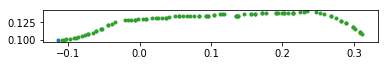

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(vertexs_2d[:,0],vertexs_2d[:,1],marker="o")
plt.plot(centro[1],centro[2],".")
plt.plot(centro_superior[1],centro_superior[2],".")
plt.plot(vertexs_2d[:,0],vertexs_2d[:,1],".")
#plt.plot(vertexs_2d[:,0],vertexs_2d[:,1],"-")
#ax.scatter(centro[1],centro[2],marker="o")
#ax.scatter(centro_superior[1],centro_superior[2],marker="o")
ax.set_aspect("equal")
plt.show()

In [18]:
from scipy.misc import comb

def bernstein_poly(i, n, t):
    """
     The Bernstein polynomial of n, i as a function of t
    """

    return comb(n, i) * ( t**(n-i) ) * (1 - t)**i


def bezier_curve(points, nTimes=1000):
    """
       Given a set of control points, return the
       bezier curve defined by the control points.

       points should be a list of lists, or list of tuples
       such as [ [1,1], 
                 [2,3], 
                 [4,5], ..[Xn, Yn] ]
        nTimes is the number of time steps, defaults to 1000

        See http://processingjs.nihongoresources.com/bezierinfo/
    """

    nPoints = len(points)
    xPoints = np.array([p[0] for p in points])
    yPoints = np.array([p[1] for p in points])

    t = np.linspace(0.0, 1.0, nTimes)

    polynomial_array = np.array([ bernstein_poly(i, nPoints-1, t) for i in range(0, nPoints)   ])

    xvals = np.dot(xPoints, polynomial_array)
    yvals = np.dot(yPoints, polynomial_array)

    return xvals, yvals

In [19]:
points = vertexs_2d.tolist()
points.append([centro_superior[1],centro_superior[2]])

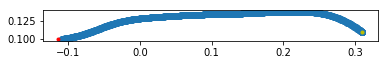

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
#points = vertexs_2d
#plt.plot(centro[1],centro[2],".")
xpoints = [p[0] for p in points]
ypoints = [p[1] for p in points]
xvals, yvals = bezier_curve(points, nTimes=500)
plt.plot(xvals, yvals,"o")
plt.plot(centro[1],centro[2],".r")
plt.plot(centro_superior[1],centro_superior[2],".y")
#plt.plot(xpoints, ypoints, "ro")
# for nr in range(len(points)):
#     plt.text(points[nr][0], points[nr][1], nr)
ax.set_aspect("equal")
plt.show()

In [21]:
landmarks_f = []
for j in range(500):
    landmarks_f.append([centro[0],xvals[j],yvals[j]])
    aux2 = pymesh.meshutils.generate_icosphere(0.01,[centro[0],xvals[j],yvals[j]])
    pymesh.save_mesh("out_energy/{}-puntosr-{}.ply".format(j,mesh_f.split("/")[-1]), aux2)

In [ ]:
landmarks_f = [centro_superior] + landmarks_f + [centro]

In [ ]:
np.shape(landmarks_f)

In [ ]:
def lamina_corte(_centro):
        delta = [0.4,0.0003,0.4]
        xdot = (head[0]*center_knee[0] + head[1]*center_knee[1] + head[2]*center_knee[2])
        norma = math.sqrt(head[0]**2+head[1]**2+head[2]**2) * math.sqrt(center_knee[0]**2+center_knee[1]**2+center_knee[2]**2)
        angle_head = (math.cos(xdot/norma) ** -1)
        angle_head_r = math.radians(90 - math.degrees(angle_head))
        q = pymesh.misc.Quaternion(quat=[1,-angle_head_r, 0,0])
        p1 = _centro + delta
        p2 = _centro  -  delta
        return pymesh.meshutils.generate_box_mesh(p2,p1 ,1)

In [ ]:
for j,f in enumerate(landmarks_f[250:]):
    print j, f
    output_mesh = pymesh.boolean(mesh, lamina_corte(np.array(f)), operation="intersection",engine="auto")
    #lamina_corte(np.array(f))
    pymesh.save_mesh("out_energy/landmarks/fetas/{}-feta-{}.ply".format(j,mesh_f.split("/")[-1]), output_mesh )
    pymesh.save_mesh("out_energy/landmarks/laminas/{}-feta-{}.ply".format(j,mesh_f.split("/")[-1]), lamina_corte(np.array(f)) )